Let's begin by importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

Reading files through an API from the World Bank site in the form of a pandas dataframe

In [2]:
df = pd.read_json('https://finances.worldbank.org/resource/9g9y-b7rs.json')

Visualizing dataset in form of the pandas dataframe

In [3]:
pd.set_option('display.max_rows',None)
df

,all_funds,bank_budget,fiscal_year,notes,unit,work_program,work_program_group
0,14.1,14.1,2015,NaN,Corporate Secretariat,Governance Services,"Institutional, Governance and Administrative S..."
1,273.7,230.9,2015,NaN,Information & Technology Solutions,Administrative Services,"Institutional, Governance and Administrative S..."
2,7.5,7.5,2015,NaN,Office of the President,Governance Services,"Institutional, Governance and Administrative S..."
3,NaN,NaN,2015,NaN,Other Operational Units' Allocations,Country Engagement,Client Engagement
4,355.5,167.8,2015,NaN,Africa,Country Engagement,Client Engagement
5,197.4,80.4,2015,NaN,East Asia & Pacific,Country Engagement,Client Engagement
6,137.8,76.6,2015,NaN,Europe & Central Asia,Country Engagement,Client Engagement
7,134.6,86.3,2015,NaN,Latin America & Caribbean,Country Engagement,Client Engagement
8,95.0,49.0,2015,NaN,Middle East & North Africa,Country Engagement,Client Engagement
9,154.6,77.6,2015,NaN,South Asia,Country Engagement,Client Engagement


Counting the no. of programs under each work category 

In [4]:
df['work_program'].value_counts()

Governance Services                                                 81
Institutional Services                                              66
Country Engagement                                                  35
Global Practices and Global Themes Program & Practice Management    30
Regions Program & Practice Management                               30
Operational Grant Making Facilities                                 25
Administrative Services                                             15
Global Engagement                                                    5
Centrally Managed Accounts & Miscellaneous Programs                  5
Funded by External Funds - All Funds                                 5
Name: work_program, dtype: int64

No. of NaNs in the notes column

In [5]:
#using the isnull() method to find the no. of NaNs
df['notes'].isnull().sum()

249

Dropping the notes column from the dataframe permanently 249 out of the 297 entries are missing. Also, intuitively it would hardly play any role in the building insights from the data. 

In [6]:
df.drop(columns = 'notes', inplace = True)

In [7]:
df.head()

,all_funds,bank_budget,fiscal_year,unit,work_program,work_program_group
0,14.1,14.1,2015,Corporate Secretariat,Governance Services,"Institutional, Governance and Administrative S..."
1,273.7,230.9,2015,Information & Technology Solutions,Administrative Services,"Institutional, Governance and Administrative S..."
2,7.5,7.5,2015,Office of the President,Governance Services,"Institutional, Governance and Administrative S..."
3,NaN,NaN,2015,Other Operational Units' Allocations,Country Engagement,Client Engagement
4,355.5,167.8,2015,Africa,Country Engagement,Client Engagement


In [8]:
df['External_funds'] = df['all_funds'] - df['bank_budget']
df.head()

,all_funds,bank_budget,fiscal_year,unit,work_program,work_program_group,External_funds
0,14.1,14.1,2015,Corporate Secretariat,Governance Services,"Institutional, Governance and Administrative S...",0.0
1,273.7,230.9,2015,Information & Technology Solutions,Administrative Services,"Institutional, Governance and Administrative S...",42.8
2,7.5,7.5,2015,Office of the President,Governance Services,"Institutional, Governance and Administrative S...",0.0
3,NaN,NaN,2015,Other Operational Units' Allocations,Country Engagement,Client Engagement,NaN
4,355.5,167.8,2015,Africa,Country Engagement,Client Engagement,187.7


Checking the data types of columns

In [9]:
df.dtypes

all_funds             float64
bank_budget           float64
fiscal_year             int64
unit                   object
work_program           object
work_program_group     object
External_funds        float64
dtype: object

Imputing missing values in the all_funds, bank_budget and External_funds column with zero

In [10]:
df['all_funds'].replace(np.NaN,0,inplace = True)
df['bank_budget'].replace(np.NaN,0,inplace = True)

In [11]:
df['External_funds'].replace(np.NaN, 0,inplace = True)

# 2015 Budget Analysis

Slicing the dataframe by indexing 2015 for further analyzing the year's program budget

In [12]:
df_2015 = df.ix[df.fiscal_year == 2015,[4,3,0,1,6]]
df_2015.head()

,work_program,unit,all_funds,bank_budget,External_funds
0,Governance Services,Corporate Secretariat,14.1,14.1,0.0
1,Administrative Services,Information & Technology Solutions,273.7,230.9,42.8
2,Governance Services,Office of the President,7.5,7.5,0.0
3,Country Engagement,Other Operational Units' Allocations,0.0,0.0,0.0
4,Country Engagement,Africa,355.5,167.8,187.7


Number of programs by work (2015) in descending order

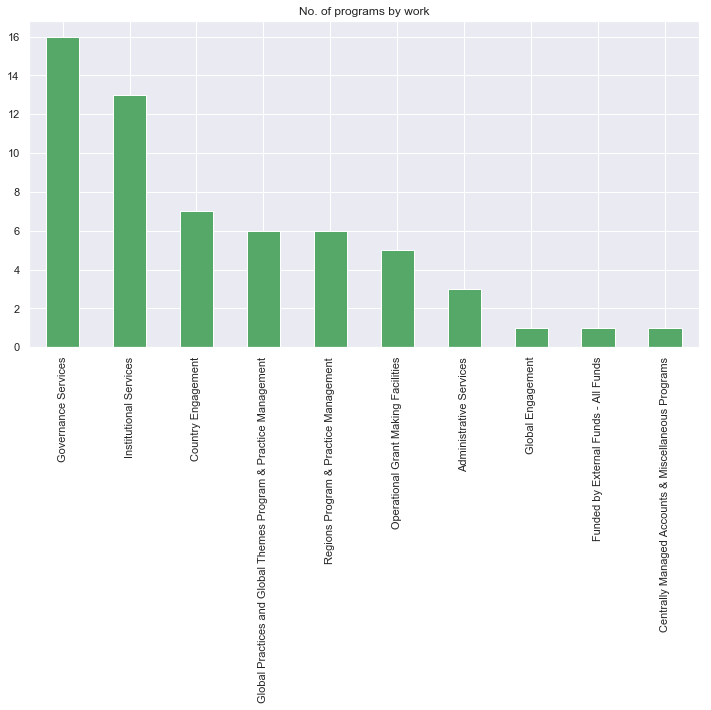

In [13]:
df_2015['work_program'].value_counts().plot(kind = 'bar', figsize = (12,6), title = 'No. of programs by work', color = 'g')

Bank budget by work function for the year

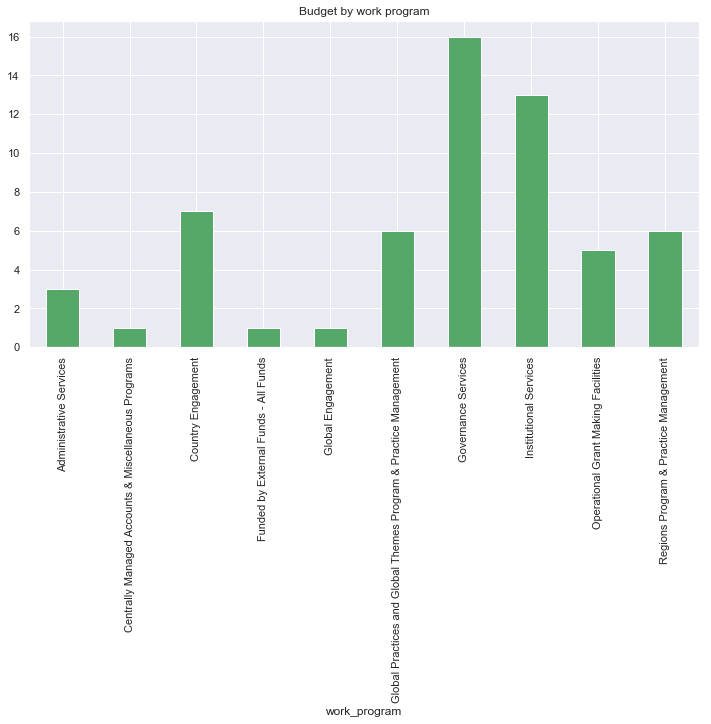

In [14]:
df_2015.groupby(['work_program'])['bank_budget'].count().plot(kind = 'bar',
                                                              color = 'g',
                                                              figsize = (12,6),
                                                              title = 'Budget by work program')

Total fund allocation by work function

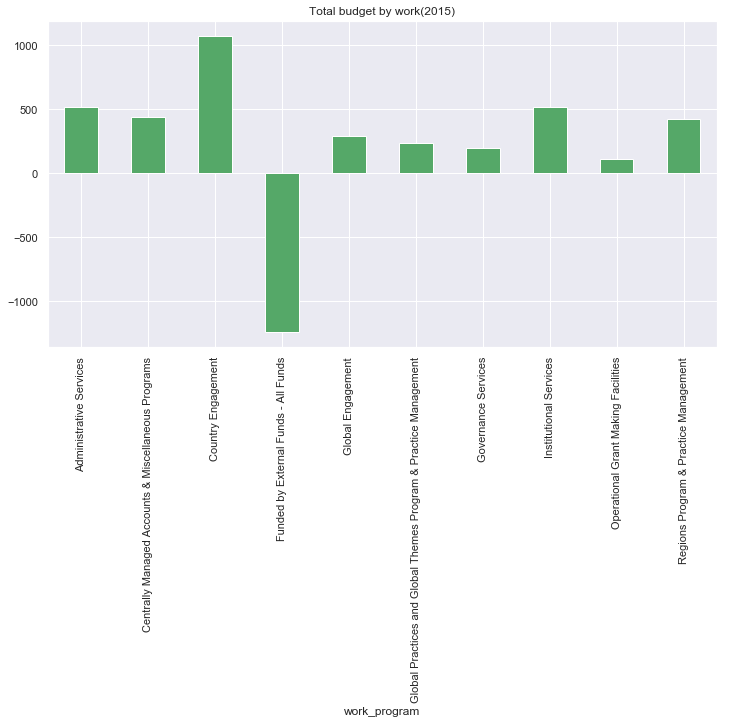

In [15]:
df_2015.groupby(['work_program'])['all_funds'].sum().plot(kind = 'bar',
                                                          figsize = (12,6),
                                                          title = 'Total budget by work(2015)',
                                                          color = 'g')

Contribution of Bank budget and External funds to total fund allocation for the year grouped by function of the work

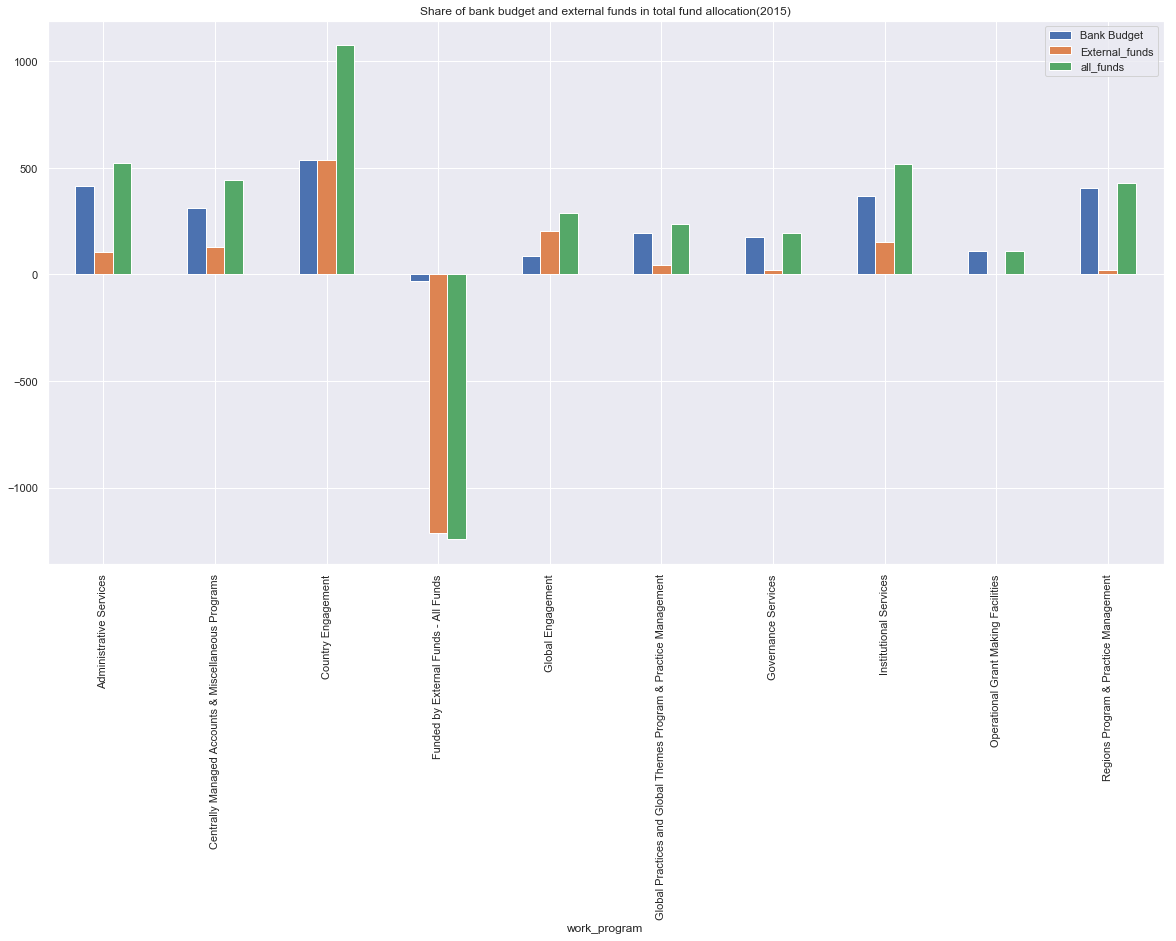

In [16]:
bb_2015 = df_2015.groupby(['work_program'])['bank_budget'].sum()
ef_2015 = df_2015.groupby(['work_program'])['External_funds'].sum()
af_2015 = df_2015.groupby(['work_program'])['all_funds'].sum()


pd.DataFrame({'Bank Budget': bb_2015,
              'External_funds': ef_2015,
              'all_funds': af_2015}).plot(kind = 'bar',
                                          figsize = (20,10),
                                          title = 'Share of bank budget and external funds in total fund allocation(2015)')

# 2018 Budget Analysis

Slicing the dataframe for analyzing the 2018 budget

In [17]:
df_2018 = df.ix[df.fiscal_year == 2018,[4,3,0,1,6]]
df_2018.head()

,work_program,unit,all_funds,bank_budget,External_funds
177,Country Engagement,Other Operational Units' Allocations,0.0,0.0,0.0
178,Administrative Services,Information & Technology Solutions,293.2,241.4,51.8
179,Governance Services,Office of the President,7.4,7.4,0.0
180,Governance Services,Corporate Secretariat,18.4,17.1,1.3
181,Country Engagement,Africa,489.2,265.7,223.5


Number of programs by work (2018) in descending order

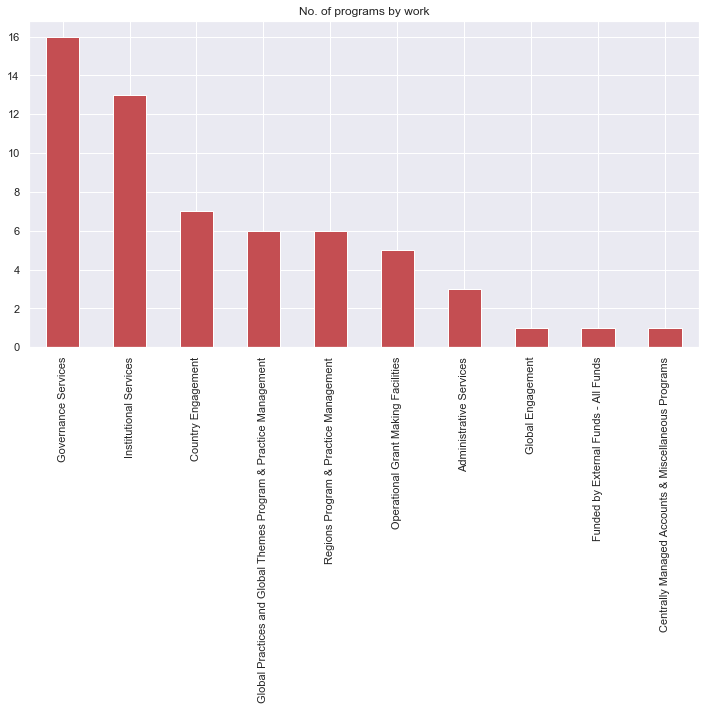

In [18]:
df_2018['work_program'].value_counts().plot(kind = 'bar', figsize = (12,6), title = 'No. of programs by work', color = 'r')

Total fund allocation by work function

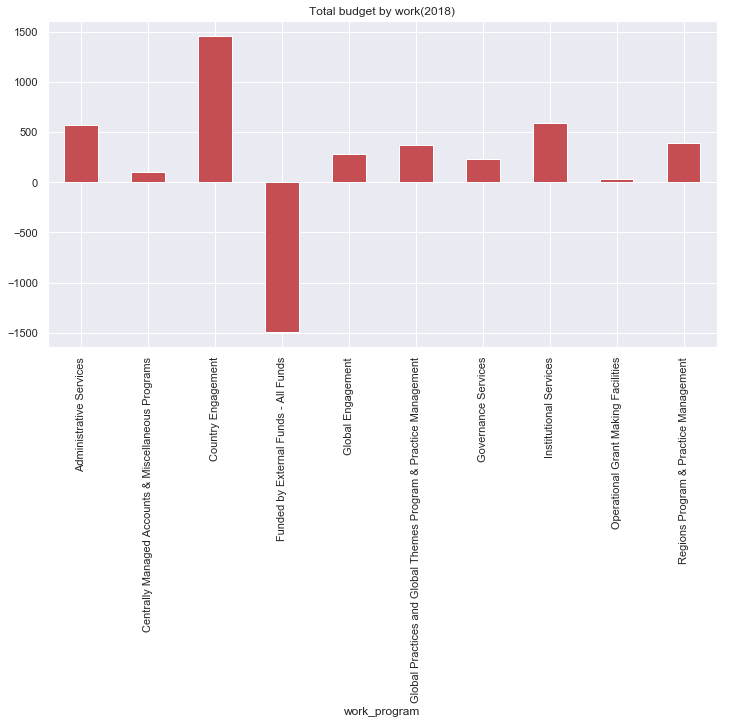

In [19]:
df_2018.groupby(['work_program'])['all_funds'].sum().plot(kind = 'bar',
                                                          figsize = (12,6),
                                                          title = 'Total budget by work(2018)',
                                                          color = 'r')

Contribution of Bank budget and External funds to total fund allocation for the year grouped by function of the work

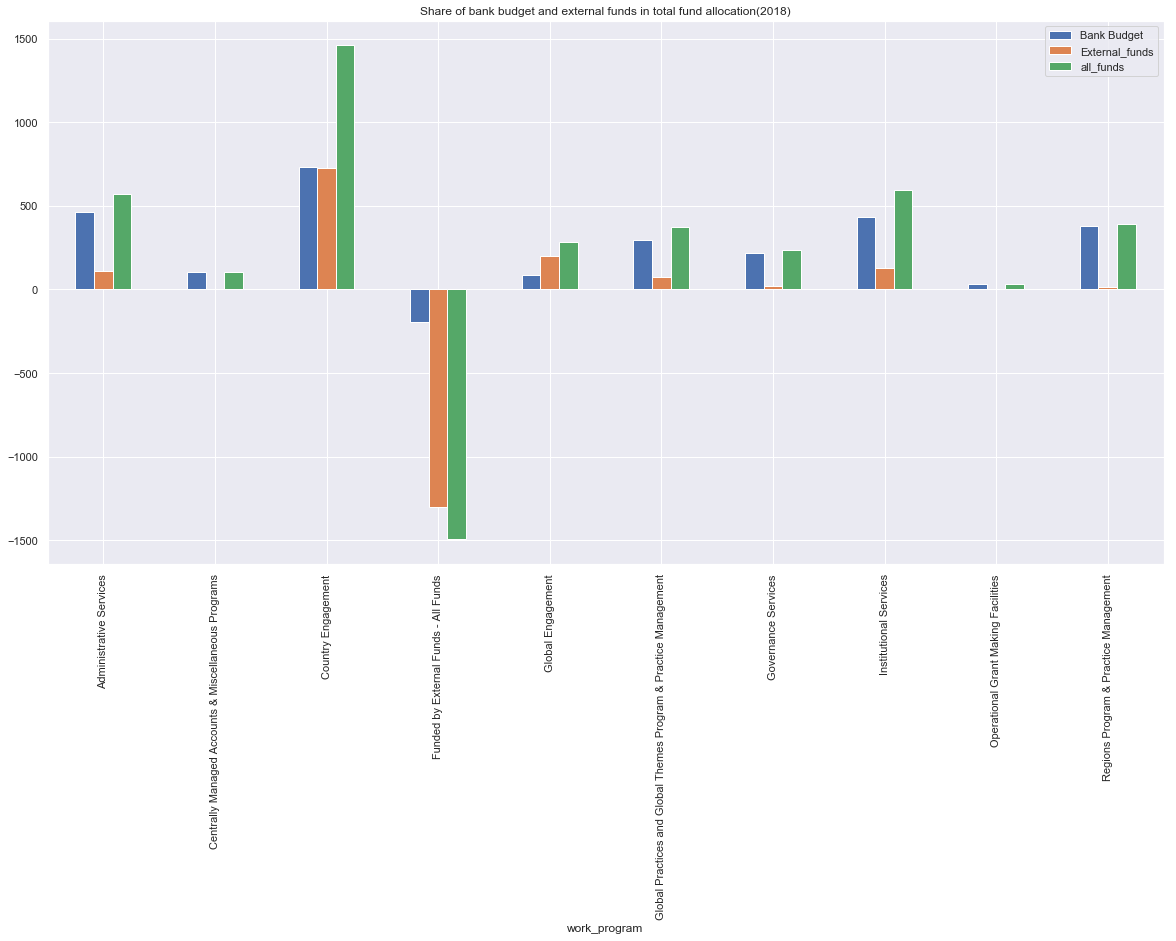

In [20]:
bb_2018 = df_2018.groupby(['work_program'])['bank_budget'].sum()
ef_2018 = df_2018.groupby(['work_program'])['External_funds'].sum()
af_2018 = df_2018.groupby(['work_program'])['all_funds'].sum()


pd.DataFrame({'Bank Budget': bb_2018,
              'External_funds': ef_2018,
              'all_funds': af_2018}).plot(kind = 'bar',
                                          figsize = (20,10),
                                          title = 'Share of bank budget and external funds in total fund allocation(2018)')

# Comparison over the years

Slicing dataframe for years 2016,2017,2019 

In [21]:
df_2016 = df.ix[df.fiscal_year == 2016,[4,3,0,1,6]]
df_2017 = df.ix[df.fiscal_year == 2017,[4,3,0,1,6]]
df_2019 = df.ix[df.fiscal_year == 2019,[4,3,0,1,6]]

Finding the total bank budget for years 2015-2019 with respect to work programs

In [22]:
bb_2015 = df_2015.groupby(['work_program'])['bank_budget'].sum()
bb_2016 = df_2016.groupby(['work_program'])['bank_budget'].sum()
bb_2017 = df_2017.groupby(['work_program'])['bank_budget'].sum()
bb_2018 = df_2018.groupby(['work_program'])['bank_budget'].sum()
bb_2019 = df_2019.groupby(['work_program'])['bank_budget'].sum()

Incorporating the results in a dataframe and plotting them in form of a bar graph

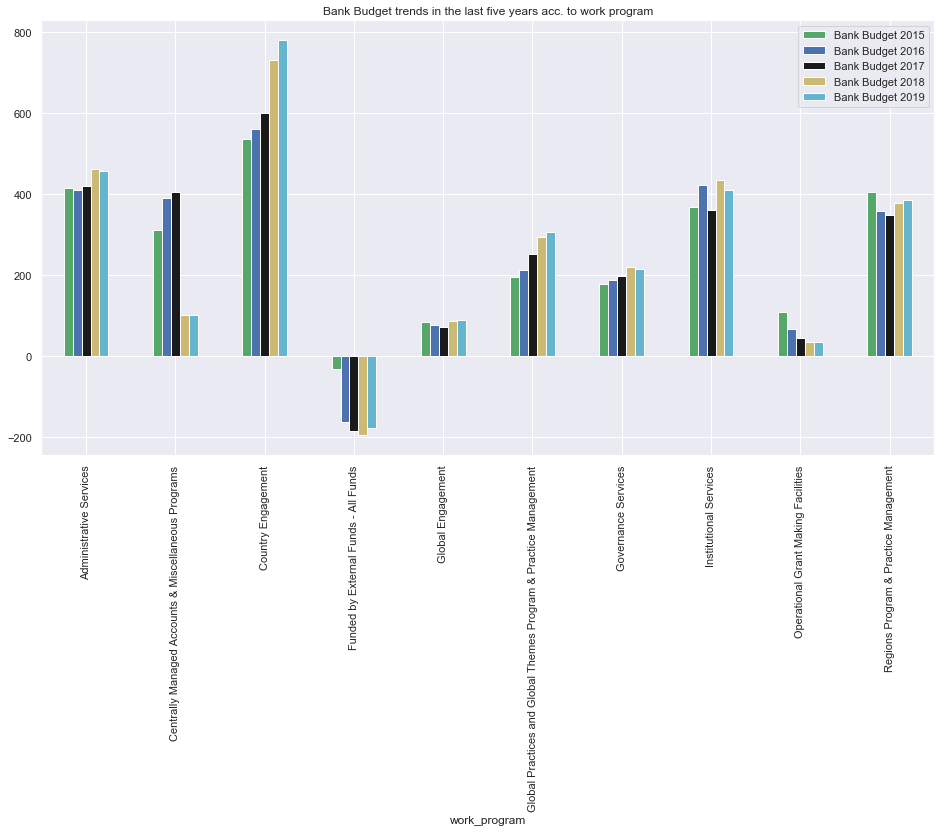

In [23]:
pd.DataFrame({'Bank Budget 2015':bb_2015,
             'Bank Budget 2016': bb_2016,
             'Bank Budget 2017':bb_2017,
             'Bank Budget 2018':bb_2018,
             'Bank Budget 2019':bb_2019}).plot(kind = 'bar',
                                               figsize = (16,8),
                                               color = ('g','b','k','y','c'),
                                               title = 'Bank Budget trends in the last five years acc. to work program')

Finding the total External Funds for years 2015-2019 with respect to work programs

In [24]:
ef_2015 = df_2015.groupby(['work_program'])['External_funds'].sum()
ef_2016 = df_2016.groupby(['work_program'])['External_funds'].sum()
ef_2017 = df_2017.groupby(['work_program'])['External_funds'].sum()
ef_2018 = df_2018.groupby(['work_program'])['External_funds'].sum()
ef_2019 = df_2019.groupby(['work_program'])['External_funds'].sum()

Incorporating the results in a dataframe and plotting them in form of a bar graph

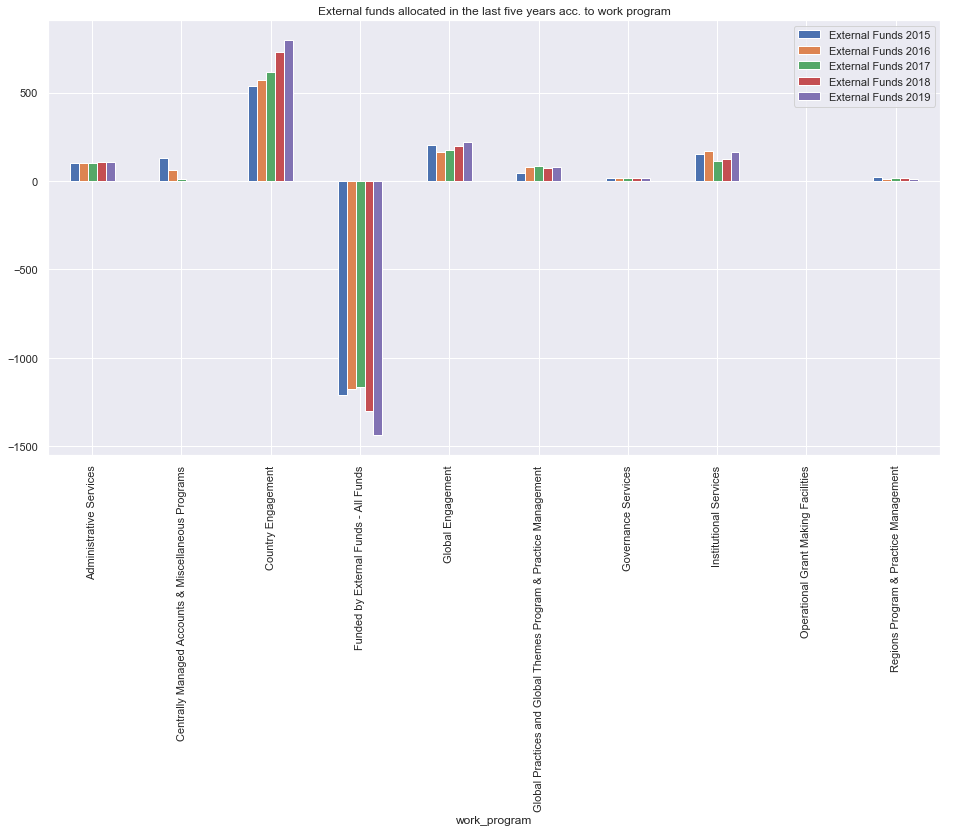

In [25]:
pd.DataFrame({'External Funds 2015':ef_2015,
             'External Funds 2016': ef_2016,
             'External Funds 2017':ef_2017,
             'External Funds 2018':ef_2018,
             'External Funds 2019':ef_2019}).plot(kind = 'bar',
                                               figsize = (16,8),
                                               title = 'External funds allocated in the last five years acc. to work program')

Finding the total Total Funds for years 2015-2019 with respect to work programs

In [26]:
af_2015 = df_2015.groupby(['work_program'])['all_funds'].sum()
af_2016 = df_2016.groupby(['work_program'])['all_funds'].sum()
af_2017 = df_2017.groupby(['work_program'])['all_funds'].sum()
af_2018 = df_2018.groupby(['work_program'])['all_funds'].sum()
af_2019 = df_2019.groupby(['work_program'])['all_funds'].sum()

Incorporating the results in a dataframe and plotting them in form of a bar graph

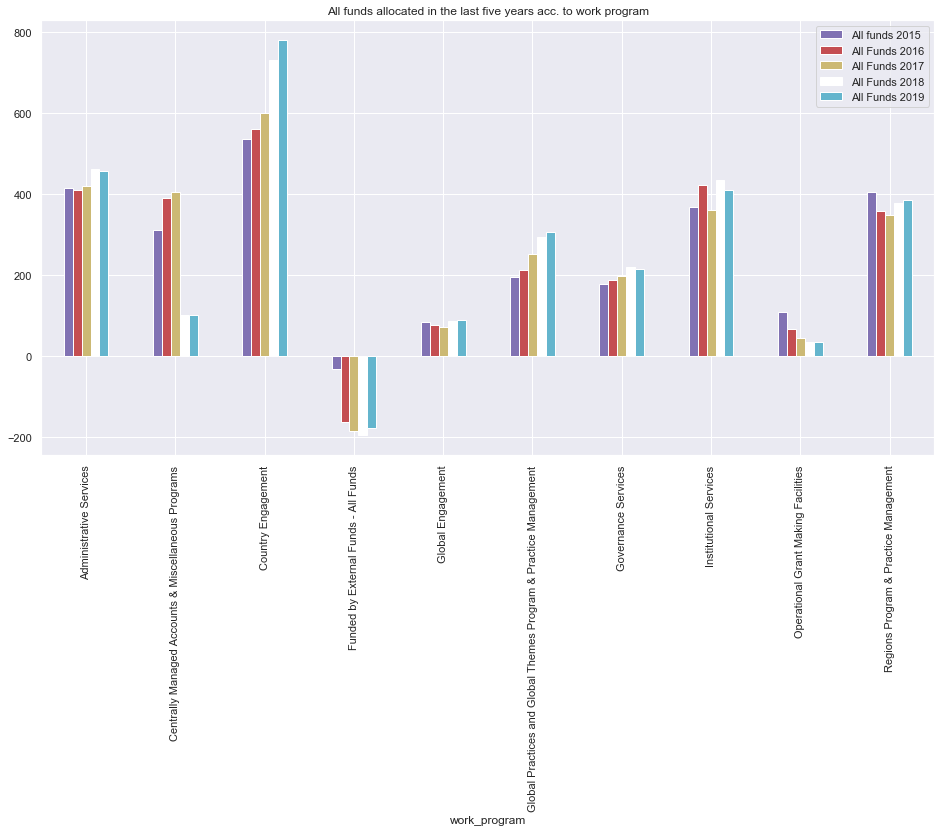

In [27]:
pd.DataFrame({'All funds 2015':bb_2015,
             'All Funds 2016': bb_2016,
             'All Funds 2017':bb_2017,
             'All Funds 2018':bb_2018,
             'All Funds 2019':bb_2019}).plot(kind = 'bar',
                                               figsize = (16,8),
                                             color = ('m','r','y','w','c'),
                                               title = 'All funds allocated in the last five years acc. to work program')

That was an in depth exploratory analysis of World Bank Budget over the course of last few years with respect to various functions the global organization performs.